<a href="https://colab.research.google.com/github/codelspak/Struggles/blob/main/K_struggles_01_Titanic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Data Science Solutions - Workflow information
출처 : 'https://www.kaggle.com/code/startupsci/titanic-data-science-solutions'
# Workflow stages : The competition solution workflow goes through seven stages described in the Data Science Solutions book.
    1. Question or problem definition.
    2. Acquire training and testing data.
    3. Wrangle, prepare, cleanse the data.
    4. Analyze, identify patterns, and explore the data.
    5. Model, predict and solve the problem.
    6. Visualize, report, and present the problem solving steps and final solution.
    7. Supply or submit the results.

# Workflow goals : The data science solutions workflow solves for seven major goals.
    1. Classifying. We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.
    2. Correlating. One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.
    3. Converting. For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.
    4. Completing. Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.
    5. Correcting. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.
    6. Creating. Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.
    7. Charting. How to select the right visualization plots and charts depending on nature of the data and the solution goals.

# 1. 라이브러리 및 데이터 불러오기
## %matplotlib inline 관련 sources
    https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline
    

In [2]:
# data analysis and wrangling (복잡하고 오래 계속되는 논쟁, 언쟁, 다툼)
import pandas as pd
import numpy as np
import random as rnd
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# IPython에서 제공하는 Rich output(도표와 같은 그림, 소리, 애니메이션과 같은 결과물)에 대한 표현 방식
# 결국 notebook을 실행한 브라우저에서 바로 Rich output을 볼 수 있게 해주는 것임

# import plotly.express as px

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# drive에서 파일 불러오기
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_test = pd.read_csv('/content/drive/MyDrive/2. Kaggle Struggle/1. Titanic - Machine Learning from Disaster/test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/2. Kaggle Struggle/1. Titanic - Machine Learning from Disaster/train.csv')
# combine those datasets to run certain operations on both datasets together 
combine = [df_train, df_test]


# 2. 데이터 EDA

## 2-1. Analyze by describing data

In [5]:
# which features are available in our dataset
print(df_train.columns.values)
# Index -> array -> just list : .values와 print 구문 조합으로 깔끔하게 결과값만 출력할 수 있음! 

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 2-1-1. 범주형/수치형 데이터 분류

In [7]:
# which features are categorical and numerical
# categorical features : the values can be based on nominal, ordinal, ratio or interval things
# numerical features : the values can be based on continuous, discrete, or timeseries things
# it is important to classify those features in order to select the appropriate plots for visualization
cat_cols = ['Survived', 'Sex', 'Embarked']
ord_cols = ['Pclass']
con_cols = ['Age', 'Fare']
discr_cols = ['SibSp', 'Parch']
# 'PassengerId'   , 

In [8]:
# beside categorical and numerical features, there are mixed data types too
# numerical, alphanumerical data within same feature
mixed_cols = ['Ticket',  'Cabin' ]

In [9]:
# which features may contain 'errors' or 'typos'?
# they just tell us outright which features may require correcting
may_corr_cols = ['Name']
# Name feature may contain errors or typos 
# as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [10]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 2-1-2. 결측치, dtypes, info() 확인

In [11]:
# which features contain blank, null or empty values? -> require correcting
df_train.isnull().sum(), df_test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64, PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [12]:
# what are the data types for various features?
df_train.dtypes, df_test.dtypes

(PassengerId      int64
 Survived         int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object, PassengerId      int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object)

In [13]:
df_train.info(), print('-'*40), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

(None, None, None)

### 2-1-3. 분포 확인

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9728221510>,
      dtype=object)

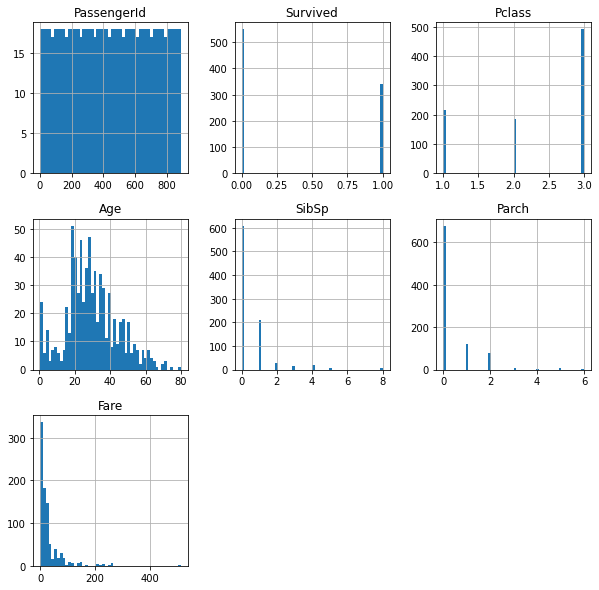

In [18]:
df_train.hist(bins = 50, figsize = (10,10))

In [24]:
# 수치형 데이터 기술통계 
df_train.describe()

# early insights i can get from the table
# 'PassengerId' : 891명임 > 전체 2224명 대비 40%에 해당
# 'Survived': cat - 0 or 1 : only 38% 만이 생존
# 'Pclass': cat
# 'Age' : num
# 'SibSp': num - disc : 75% - 1 > 샘플의 75%가 형제, 배우자 없이 탑승함
# 'Parch': num - disc : 75% - 0 > 샘플의 75% 이상이 부모, 자녀 없이 탑승함
# 'Fare' : num - conti

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
577/891

0.6475869809203143

In [28]:
# 범주형 데이터 기술통계 (분포)
# df_train.describe(include = 'object') : 아래와 같이 쓸 수도 있음
df_train.describe(include = ['O'])

# 'Name' - n.unique = n.count : 전부 unique 함
# 'Sex' - male : 65% 
# 'Ticket'
# 'Cabin' - 결측치 존재 (77%) / count > n.unique : several passengers share a cabin or cabin values have several duplicates across samples
# 'Embarked'- 결측치 존재(0.003%) / three possible values - S port : used by most passengers

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Assumptions based on data analysis
#### we arrived at several following assumptions. we may validate these assumptions further before taking appropriate actions
    1. Correlating
    2. Completing
    3. Correcting
    4. Creating
    5. Classifying

In [ ]:
# Correlating : how well each feature correlate with survival

In [ ]:
# Completing : Age and Embarked features as they are definitely or may be correlating with survival or other important feature

In [ ]:
# Correting : drop some features as
# 1. it contains high ratio of duplicates 
# 2. there may not be a correlation between the column and other important features
# 3. it is highly incomplete or contains many null values both in training and testing dataset
# 4. it does not contribute to survival
# 5.  

In [ ]:
# Creating : new features by
# 1. getting total count of certain values
# 2. engineering a categorical feature such as Name to extract Title
# 3. grouping some values, for example, making a new feature column for Age band : continuous numerical feature -> ordinal categorical feature
# 4. making a range feature such as a Fare range feature if it helps our analysis 


In [ ]:
# Classifying

## 2-2. Analyze by pivoting features

## 2-3. Analyze by visualizing data

## 2-4. Wrangle data
##### we have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals

# Model, Predict and Solve